In [10]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import info_bandit

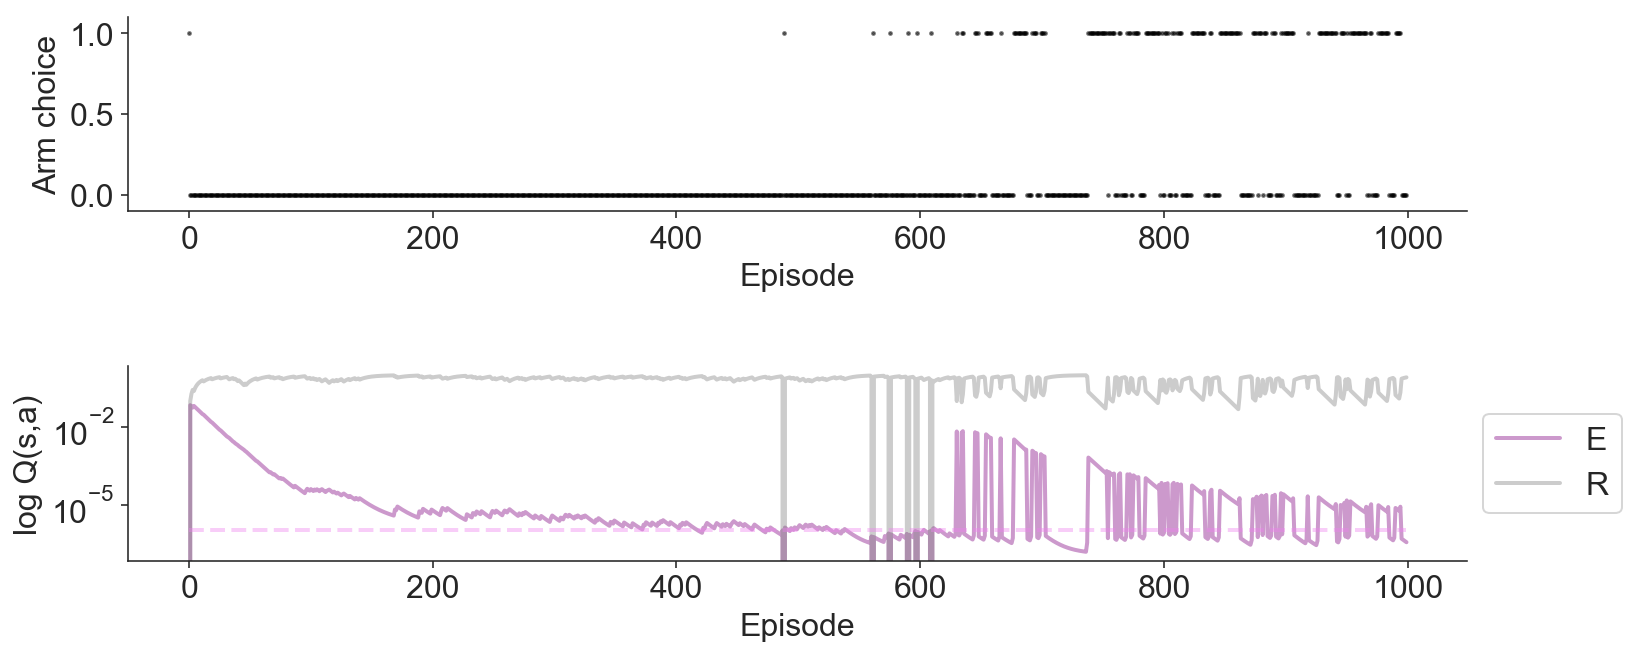

In [45]:
tie_break = 'next' # round robin tie break strategy
tie_threshold = 1e-6  # epsilon in the paper

# Run bandit exps
episodes, actions, E, R = info_bandit(
    env_name='BanditTwoArmedHighLowFixed-v0', 
    num_episodes=1000, lr=.1, 
    tie_threshold=tie_threshold, tie_break=tie_break
)

# Plots
fig = plt.figure(figsize=(12, 5))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.ylim(-.1, 1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# Q
plt.subplot(grid[1, 0])
plt.plot(episodes, E, color="purple", alpha=0.4, linewidth=2, label="E")
plt.plot(episodes, R, color="grey", alpha=0.4, linewidth=2, label="R")
plt.plot(episodes, np.repeat(tie_threshold, np.max(episodes)+1), 
         color="violet", alpha=0.4, ls='--', linewidth=2)
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/info_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/info_bandit.eps",  bbox_inches='tight')